# Hierarchical Clustering

* The code below demonstrates the use of the Hierarchical Clustering.
* Hierarchical Clustering is a part of unsupervised machine learning and thus there is no training and testing data.
* Hierarchical Clustering helps forming clusters of the dataset and getting useful insights.

### Implementation in Python

The lits of python packages used for data analysis:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import euclidean_distances

The protien.csv dataset is present in the data folder.

In [2]:
food = pd.read_csv('./data/protein.csv')

A preview of the imported dataset: 

In [3]:
head = int(raw_input("To display first N rows, enter N: "))
food.head(head)

To display first N rows, enter N: 6


,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


Displaying Summary statisitcs of all the numeric variables in the dataset. Nulls values are handled automatically.

In [4]:
food.describe(percentiles=True)

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
100%,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


A scatter plot matrix of all the numeric varibles.

Populating the interactive namespace from numpy and matplotlib


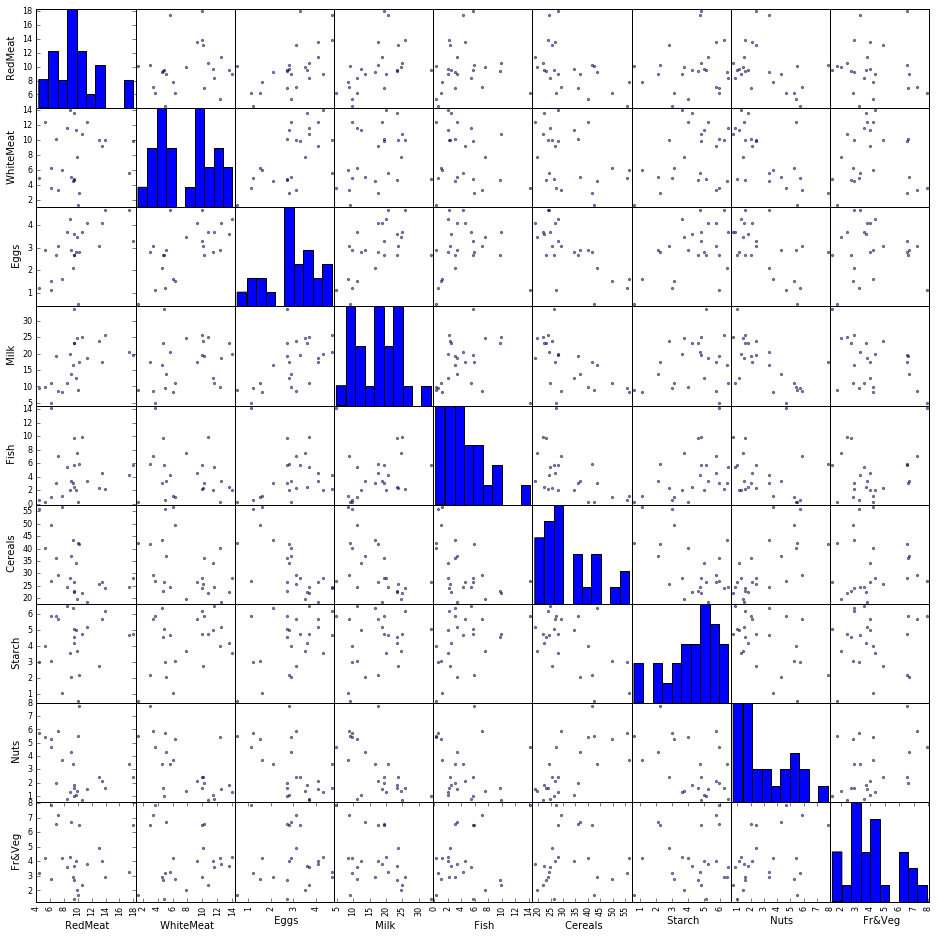

In [5]:
%pylab inline

axes = pd.tools.plotting.scatter_matrix(food, alpha=0.5, figsize=(16, 16))

Dropping the Country column (categorical) to fit Hierarchical Clustering algorithm to the dataset. Also, converting the dataset to a numpy array matrix.

In [6]:
train = food.drop('Country', axis = 1) 
print "Dataset type before conversion: ", type(train)

std_data = train.as_matrix()
print "\nDataset type after conversion: ", type(std_data)
print "\n", std_data

Dataset type before conversion:  <class 'pandas.core.frame.DataFrame'>

Dataset type after conversion:  <type 'numpy.ndarray'>

[[ 10.1   1.4   0.5   8.9   0.2  42.3   0.6   5.5   1.7]
 [  8.9  14.    4.3  19.9   2.1  28.    3.6   1.3   4.3]
 [ 13.5   9.3   4.1  17.5   4.5  26.6   5.7   2.1   4. ]
 [  7.8   6.    1.6   8.3   1.2  56.7   1.1   3.7   4.2]
 [  9.7  11.4   2.8  12.5   2.   34.3   5.    1.1   4. ]
 [ 10.6  10.8   3.7  25.    9.9  21.9   4.8   0.7   2.4]
 [  8.4  11.6   3.7  11.1   5.4  24.6   6.5   0.8   3.6]
 [  9.5   4.9   2.7  33.7   5.8  26.3   5.1   1.    1.4]
 [ 18.    9.9   3.3  19.5   5.7  28.1   4.8   2.4   6.5]
 [ 10.2   3.    2.8  17.6   5.9  41.7   2.2   7.8   6.5]
 [  5.3  12.4   2.9   9.7   0.3  40.1   4.    5.4   4.2]
 [ 13.9  10.    4.7  25.8   2.2  24.    6.2   1.6   2.9]
 [  9.    5.1   2.9  13.7   3.4  36.8   2.1   4.3   6.7]
 [  9.5  13.6   3.6  23.4   2.5  22.4   4.2   1.8   3.7]
 [  9.4   4.7   2.7  23.3   9.7  23.    4.6   1.6   2.7]
 [  6.9  10.2   2

The ```euclidean_distances()``` function returns the distance matrix computed by using the euclidean distance measure between the rows of a data matrix.

In [7]:
euclidean_distances(std_data)

array([[  0.        ,  23.17628098,  21.65017321,  15.68821214,
         15.15453727,  30.15758611,  22.8659135 ,  30.99096643,
         23.1741235 ,  12.13630916,  13.15712735,  27.90250885,
         10.62449999,  28.30212006,  26.8054099 ,  17.64397914,
         23.11103632,  10.31939921,  17.14992711,  29.9879976 ,
         24.92889889,  24.30843475,  11.03403825,  29.14395306,
         15.47481825],
       [ 23.17628098,   0.        ,   7.86829079,  32.30448885,
         10.30533842,  11.95658814,  10.74290464,  17.42125139,
         11.01090369,  19.52972094,  16.97498159,  10.03942229,
         14.68877122,   6.76387463,  13.68466295,   9.94233373,
         22.93120145,  25.26123512,  17.44018349,  13.03226765,
          7.5835348 ,  12.92052631,  19.04284643,  10.13163363,
         31.94698734],
       [ 21.65017321,   7.86829079,   0.        ,  32.78612511,
         10.60990104,  11.11980216,   8.92860571,  17.60312472,
          6.00749532,  18.25486237,  18.78403578,   9.1465

The ```linkage()``` function is used for fitting hierarchical clustering to the dataset. The second parameter below defines the clustering method to be used - single, complete, average , ect.

### Using average linkage hierarchial clustering:

In [8]:
# generate the linkage matrix
avg_linkage = linkage(std_data, 'average')

In [9]:
avg_linkage

array([[  5.        ,  19.        ,   4.79583152,   2.        ],
       [  3.        ,  24.        ,   4.8754487 ,   2.        ],
       [ 11.        ,  20.        ,   5.09705797,   2.        ],
       [  2.        ,   8.        ,   6.00749532,   2.        ],
       [ 14.        ,  25.        ,   6.12296317,   3.        ],
       [ 13.        ,  23.        ,   6.52533524,   2.        ],
       [ 21.        ,  28.        ,   6.90860578,   3.        ],
       [ 17.        ,  26.        ,   7.62286377,   3.        ],
       [  9.        ,  12.        ,   7.97684148,   2.        ],
       [ 27.        ,  30.        ,   8.11506475,   4.        ],
       [  4.        ,  15.        ,   8.25530133,   2.        ],
       [  1.        ,  34.        ,   8.62961634,   5.        ],
       [ 16.        ,  18.        ,   8.78862902,   2.        ],
       [ 22.        ,  33.        ,   8.81880138,   3.        ],
       [ 31.        ,  36.        ,   9.97736309,   8.        ],
       [ 10.        ,  35

```avg_linkage``` tell us which clusters were merged for all the iteration. Each row of the resulting array has the format [idx1, idx2, dist, sample_count]. As an example, in the first iteration, the ```linkage()``` algorithm decided to merge the two clusters (original samples here) with indices 5 and 19, as they only had a distance of 4.79583152. This created a cluster with a total of 2 samples.

Plotting a Dendrogram for average linkage:

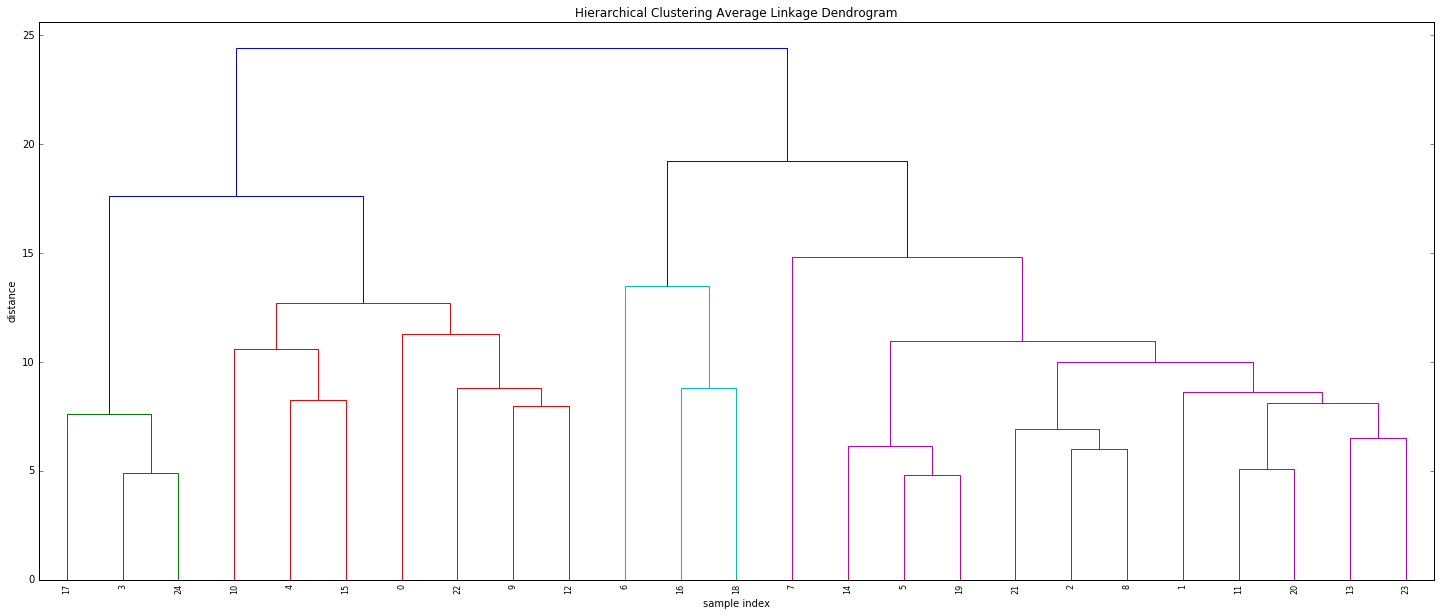

In [10]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Average Linkage Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    avg_linkage, 
    leaf_rotation = 90.,  # rotates the x axis labels
    leaf_font_size = 8.,  # font size for the x axis labels
)
plt.show()

Plotting a truncated dendrogram for average linkage. The parameter ```show_contracted``` allows us to draw black dots at the heights of those previous cluster merges, so we can still spot gaps even if we don't want to clutter the whole visualization.

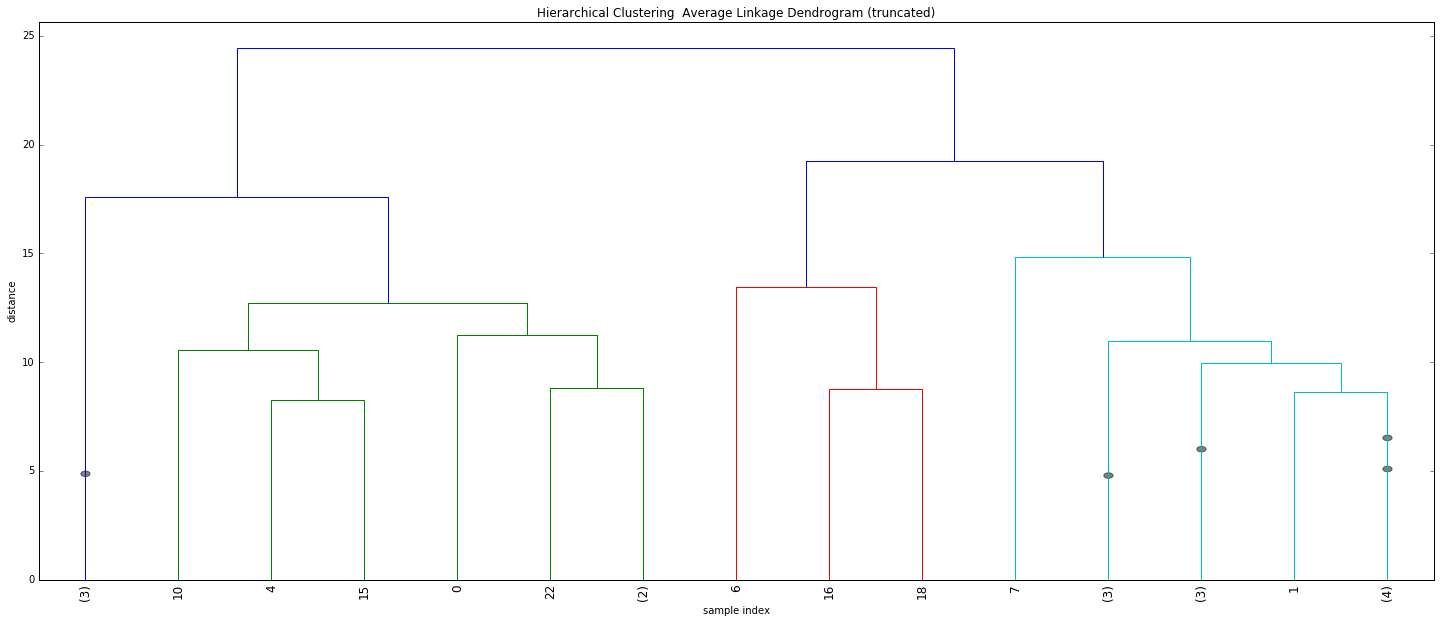

In [11]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering  Average Linkage Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    avg_linkage,
    truncate_mode = 'lastp',  # show only the last p merged clusters
    p = 15,  # show only the last p merged clusters
    show_leaf_counts = True,  # numbers in brackets are counts
    leaf_rotation = 90.,
    leaf_font_size = 12.,
    show_contracted = True,  # to get a distribution impression in truncated branches
)
plt.show()

The code below checks the **Cophenetic Correlation Coefficient** of the clustering with the help of ```cophenet()``` function. This is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. The closer the value is to 1, the better the clustering preserves the original distances. This coefficient has also been proposed for use as a test for nested clusters. 

In [12]:
c, coph_dists = cophenet(avg_linkage, pdist(std_data))
c

0.71932495071457936

### Using single linkage hierarchial clustering:

In [13]:
# generate the linkage matrix
single_linkage = linkage(std_data, 'single')

In [14]:
single_linkage

array([[  5.        ,  19.        ,   4.79583152,   2.        ],
       [  3.        ,  24.        ,   4.8754487 ,   2.        ],
       [ 11.        ,  20.        ,   5.09705797,   2.        ],
       [ 14.        ,  25.        ,   5.55787729,   3.        ],
       [  2.        ,   8.        ,   6.00749532,   2.        ],
       [ 13.        ,  27.        ,   6.2976186 ,   3.        ],
       [ 23.        ,  30.        ,   6.52533524,   4.        ],
       [  1.        ,  31.        ,   6.76387463,   5.        ],
       [ 21.        ,  29.        ,   6.83008053,   3.        ],
       [ 17.        ,  26.        ,   6.91086102,   3.        ],
       [ 32.        ,  33.        ,   7.52595509,   8.        ],
       [  9.        ,  12.        ,   7.97684148,   2.        ],
       [ 22.        ,  36.        ,   8.17557337,   3.        ],
       [  4.        ,  15.        ,   8.25530133,   2.        ],
       [ 28.        ,  35.        ,   8.36002392,  11.        ],
       [ 37.        ,  38

Plotting a Dendrogram for single linkage:

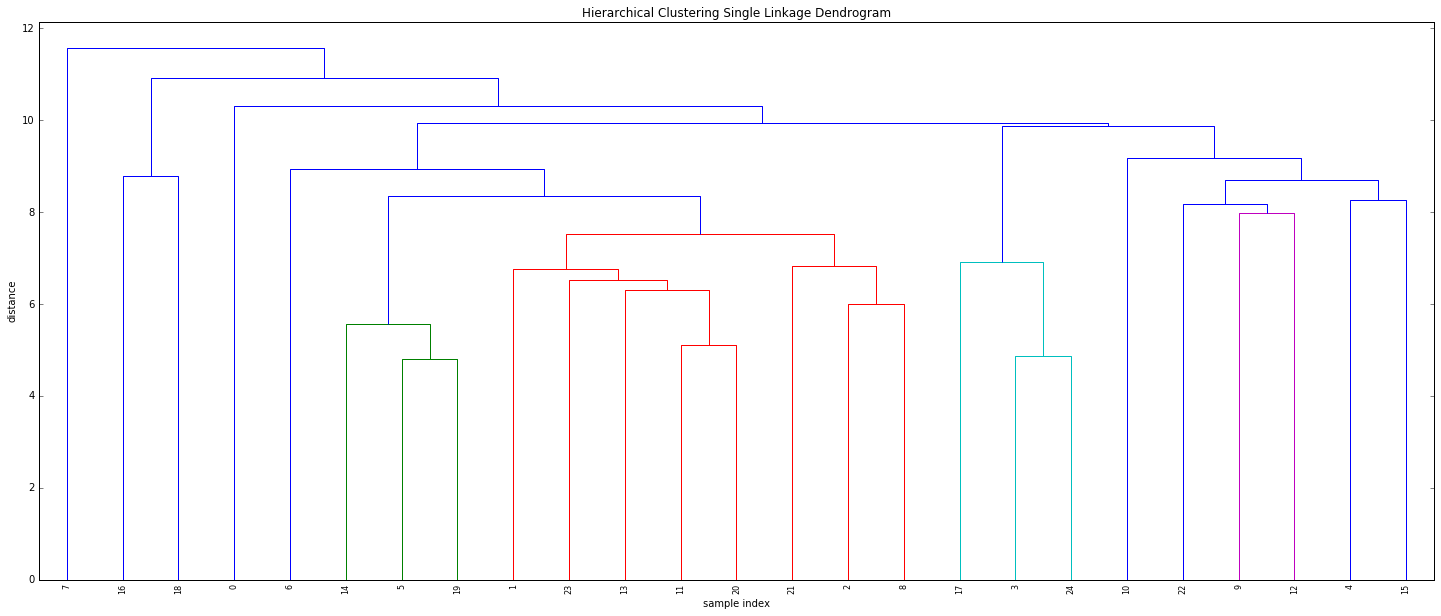

In [15]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Single Linkage Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    single_linkage, 
    leaf_rotation = 90.,  # rotates the x axis labels
    leaf_font_size = 8.,  # font size for the x axis labels
)
plt.show()

The **Cophenetic Correlation Coefficient** for single linkage:

In [16]:
c, coph_dists = cophenet(single_linkage, pdist(std_data))
c

0.56095988692787524

### Using complete linkage hierarchial clustering:

In [17]:
# generate the linkage matrix
complete_linkage = linkage(std_data, 'complete')

In [18]:
complete_linkage

array([[  5.        ,  19.        ,   4.79583152,   2.        ],
       [  3.        ,  24.        ,   4.8754487 ,   2.        ],
       [ 11.        ,  20.        ,   5.09705797,   2.        ],
       [  2.        ,   8.        ,   6.00749532,   2.        ],
       [ 13.        ,  23.        ,   6.52533524,   2.        ],
       [ 14.        ,  25.        ,   6.68804904,   3.        ],
       [ 21.        ,  28.        ,   6.98713103,   3.        ],
       [  9.        ,  12.        ,   7.97684148,   2.        ],
       [  4.        ,  15.        ,   8.25530133,   2.        ],
       [ 17.        ,  26.        ,   8.33486653,   3.        ],
       [ 16.        ,  18.        ,   8.78862902,   2.        ],
       [ 22.        ,  32.        ,   9.46202938,   3.        ],
       [ 27.        ,  29.        ,   9.70978888,   4.        ],
       [  1.        ,  37.        ,  10.13163363,   5.        ],
       [ 10.        ,  33.        ,  11.99249765,   3.        ],
       [  0.        ,  36

Plotting a Dendrogram for complete linkage:

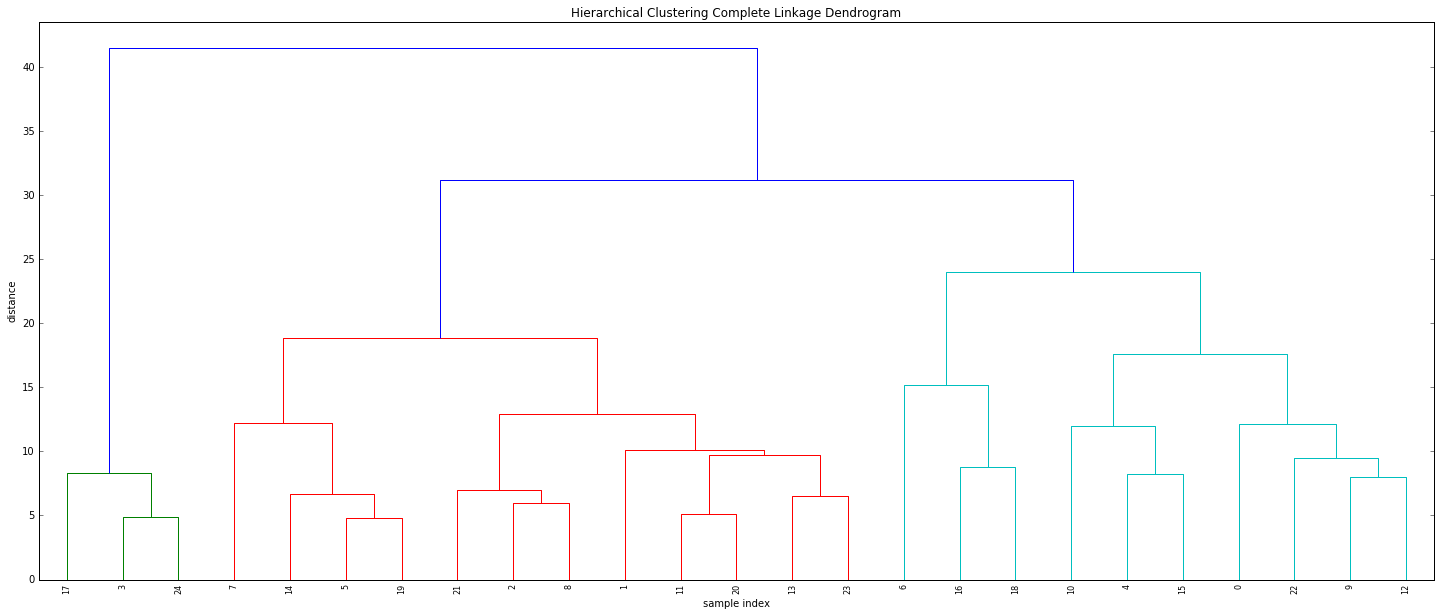

In [19]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Complete Linkage Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    complete_linkage, 
    leaf_rotation = 90.,  # rotates the x axis labels
    leaf_font_size = 8.,  # font size for the x axis labels
)
plt.show()

The **Cophenetic Correlation Coefficient** for complete linkage:

In [20]:
c, coph_dists = cophenet(complete_linkage, pdist(std_data))
c

0.76711370338587548

## Summary

1. *Cophenetic Correlation Coefficient* for **Average Linkage**: 0.72
2. *Cophenetic Correlation Coefficient* for **Single Linkage**: 0.56
3. *Cophenetic Correlation Coefficient* for **Complete Linkage**: 0.77